<a href="https://colab.research.google.com/github/jjevans25/UCI-Diabetes-Data/blob/master/Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [ ]:
import pandas as pd 

In [ ]:
Dia_df = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
Dia_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,1
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,1
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,0


In [ ]:
Dia_df = Dia_df.replace(to_replace=['Negative', 'Positive'], value=[0, 1])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

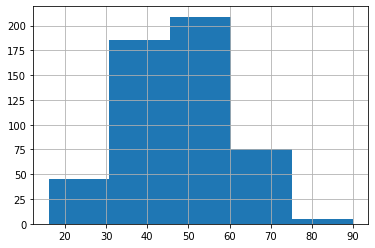

In [ ]:
Dia_df["Age"].hist(bins=5)

In [ ]:
#from sklearn.model_selection import StratifiedShuffleSplit

#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(Dia_df, Dia_df["Age"]):
#    strat_train_set = Dia_df.loc[train_index]
#    strat_test_set = Dia_df.loc[test_index]

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Dia_df, test_size = 0.2, random_state = 42)

In [ ]:
train_set.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
434,53,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,1
436,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,1
208,54,Male,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,0
332,50,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,0
220,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0


In [ ]:
dia_train = train_set.drop("class", axis=1) # drop labels for training set
dia_labels = train_set["class"].copy()

In [ ]:
train_set = train_set.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [ ]:
train_set.head()

In [ ]:
train_cat = dia_train[["Gender"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
MultiColumnLabelEncoder(columns = ['Polyuria',	'Polydipsia',	'sudden weight loss',	'weakness',	'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis',	'muscle stiffness',	'Alopecia',	'Obesity']).fit_transform(train_set)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(train_cat)
housing_cat_1hot

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
train_set = np.array(ct.fit_transform(train_set))

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), [2])], remainder='passthrough')
train_set = np.array(ct.fit_transform(train_set))

In [ ]:
print(scaled_features)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['Polyuria',	'Polydipsia',	'sudden weight loss',	'weakness',	'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis',	'muscle stiffness',	'Alopecia',	'Obesity']))
    # add more pipeline steps as needed
])
#encoding_pipeline.fit_transform(train_set)

In [ ]:
from sklearn.compose import ColumnTransformer

enc_attribs = ['Polyuria', 'Polydipsia', 'sudden weight loss',	'weakness',	'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis',	'muscle stiffness',	'Alopecia',	'Obesity']
num_attribs = ['Age']
cat_attribs = list(train_set[["Gender"]])

full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')

dia_prepared = full_pipeline.fit_transform(dia_train)

In [ ]:
dia_prepared

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(dia_prepared, dia_labels)

In [ ]:
some_data = dia_train.iloc[:5]
some_labels = dia_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", log_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
from sklearn.metrics import accuracy_score

diabetes_predictions = log_reg.predict(dia_prepared)
accuracy_score(dia_labels, diabetes_predictions)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dia_labels, diabetes_predictions)

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(dia_prepared, dia_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score

diabetes_predictions = clf.predict(dia_prepared)
accuracy_score(dia_labels, diabetes_predictions)

0.9759615384615384

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dia_labels, diabetes_predictions)

array([[161,   6],
       [  4, 245]])

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(dia_prepared, dia_labels)

In [ ]:
diabetes_predictions = clf.predict(dia_prepared)
accuracy_score(dia_labels, diabetes_predictions)

In [ ]:
confusion_matrix(dia_labels, diabetes_predictions)

In [ ]:
X_test = test_set.drop("class", axis=1) # drop labels for testing set
y_test = test_set["class"].copy()

In [ ]:
full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')



In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
X_test_prepared

In [ ]:
diabetes_predictions = clf.predict(X_test_prepared)
accuracy_score(y_test, diabetes_predictions)

0.9615384615384616

In [ ]:
confusion_matrix(y_test, diabetes_predictions)

array([[30,  3],
       [ 1, 70]])

In [ ]:
some_data = dia_train.iloc[:5]

In [ ]:
import numpy as np

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("class", SVC())
    ])

full_pipeline_with_predictor.fit(dia_train, dia_labels)
full_pipeline_with_predictor.predict(some_data)

array([1, 1, 0, 0, 0])

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [ ]:
my_model.predict(some_data)

array([1, 1, 0, 0, 0])